In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from palettable.colorbrewer.qualitative import Dark2_7 as Colors
MColors = Colors.mpl_colors

In [3]:
with open("Data/KalmanFilteredPath.json") as fp:
	KalmanFilteredPath = json.load(fp)
with open("Data/KalmanRealPath.json") as fp:
	KalmanRealPath = json.load(fp)
with open("Data/KalmanSensePath.json") as fp:
	KalmanSensePath = json.load(fp)
K = [KalmanRealPath,KalmanSensePath, KalmanFilteredPath]

In [4]:
with open("Data/ParticleFilteredPath10.json") as fp:
	ParticleFilteredPath10 = json.load(fp)
with open("Data/ParticleRealPath10.json") as fp:
	ParticleRealPath10 = json.load(fp)
with open("Data/ParticleSensePath10.json") as fp:
	ParticleSensePath10 = json.load(fp)
P10 = [ParticleRealPath10, ParticleSensePath10, ParticleFilteredPath10]

In [5]:
with open("Data/ParticleFilteredPath100.json") as fp:
	ParticleFilteredPath100 = json.load(fp)
with open("Data/ParticleRealPath100.json") as fp:
	ParticleRealPath100 = json.load(fp)
with open("Data/ParticleSensePath100.json") as fp:
	ParticleSensePath100 = json.load(fp)
P100 = [ParticleRealPath100, ParticleSensePath100, ParticleFilteredPath100]

In [18]:
with open("Data/ParticleFilteredPath1000.json") as fp:
	ParticleFilteredPath1000 = json.load(fp)
with open("Data/ParticleRealPath1000.json") as fp:
	ParticleRealPath1000 = json.load(fp)
with open("Data/ParticleSensePath1000.json") as fp:
	ParticleSensePath1000 = json.load(fp)
P1000 = [ParticleRealPath1000, ParticleSensePath1000, ParticleFilteredPath1000]

In [19]:
with open("Data/ParticleFilteredPath10000.json") as fp:
	ParticleFilteredPath10000 = json.load(fp)
with open("Data/ParticleRealPath10000.json") as fp:
	ParticleRealPath10000 = json.load(fp)
with open("Data/ParticleSensePath10000.json") as fp:
	ParticleSensePath10000 = json.load(fp)
P10000 = [ParticleRealPath10000, ParticleSensePath10000, ParticleFilteredPath10000]


# Test

35.71835524547732
109.98370021797166
73.7320366103034
66.17221593500219


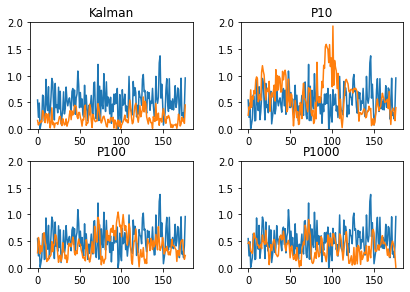

In [10]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout()
MethodList = [K,P10,P100,P1000]
NameList = ["Kalman","P10","P100","P1000"]
for i in range(len(MethodList)):
	method = MethodList[i]
	real = [np.array([pos]) for pos in method[0]]
	sensed = [np.array([pos]) for pos in method[1]]
	filtered = [np.array([pos]) for pos in method[2]]
	
	err_sen = []
	err_filt = []
	for j in range(len(real)):
		err_sen.append(np.linalg.norm(real[j]-sensed[j]))
		err_filt.append(np.linalg.norm(real[j]-filtered[j]))
	x = list(range(len(err_sen)))
	axs[int(i/2),i%2].plot(x,err_sen,)
	axs[int(i/2),i%2].plot(x,err_filt)
	axs[int(i/2),i%2].set_title(NameList[i])
	axs[int(i/2),i%2].set_ylim([0,2])
	print(sum(err_filt))

# Output

In [20]:
MethodList = [K,P10,P100,P1000,P10000]
NameList = ["Kalman Filter","Particle Filter + 10","Particle Filter + 100","Particle Filter + 1000","Particle Filter + 10000"]
for i in range(len(MethodList)):
	method = MethodList[i]
	real = [np.array([pos]) for pos in method[0]]
	sensed = [np.array([pos]) for pos in method[1]]
	filtered = [np.array([pos]) for pos in method[2]]
	
	err_sen = []
	err_filt = []
	for j in range(len(real)):
		err_sen.append(np.linalg.norm(real[j]-sensed[j]))
		err_filt.append(np.linalg.norm(real[j]-filtered[j]))
	x = list(range(len(err_sen)))
	plt.plot(x,err_sen,)
	plt.plot(x,err_filt)
	plt.title(NameList[i])
	plt.ylim([0,2])
	plt.legend(["Sensor Error", "Filter Error"])
	plt.savefig("AnalysisOut/"+NameList[i]+"Error.pdf",format="pdf")
	plt.close()
	print(sum(err_filt))

35.71835524547732
109.98370021797166
73.7320366103034
66.17221593500219
66.54488137001455


In [27]:
for i in range(len(MethodList)):
	method = MethodList[i]
	plt.plot(np.array(method[0])[:,0],np.array(method[0])[:,1])
	plt.plot(np.array(method[1])[:,0],np.array(method[1])[:,1], 'o', markersize=1)
	plt.plot(np.array(method[2])[:,0],np.array(method[2])[:,1])
	plt.legend(["Real Path", "Sensor Input", "Filtered Path"])
	plt.savefig("AnalysisOut/"+NameList[i]+"Path.pdf",format="pdf")
	plt.close()


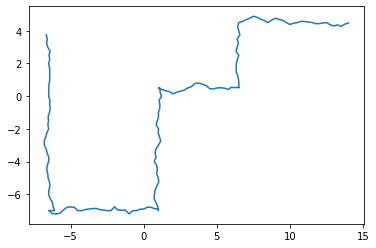

In [9]:
plt.plot(np.array(K[0])[:,0],np.array(K[0])[:,1])

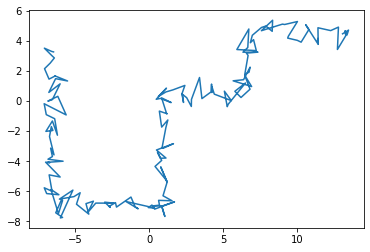

In [10]:
plt.plot(np.array(K[1])[:,0],np.array(K[1])[:,1])

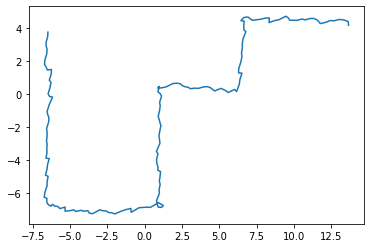

In [11]:

plt.plot(np.array(K[2])[:,0],np.array(K[2])[:,1])